In [20]:
"""
A. For each tissue, enrichment [how likely are eSTRs to fall in TF sites]
Fisher test at each tissue
    Background: All STRs
    Forground: eSTRs that fall within TFs 

"""

# Libraries
from collections import defaultdict
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as ss
import seaborn.apionly as sns

#variables

SHORTEN = {
    "Artery-Aorta":"Artery.A"     ,
    "Artery-Tibial": "Artery.T",
    "Adipose-Subcutaneous": "Adipose.S",    
    "Adipose-Visceral":"Adipose.V",
    "Brain-Caudate":"Caudate"   , 
    "Brain-Cerebellum":"Cerebellum",
    "Cells-Transformedfibroblasts": "Fibroblast",
    "Esophagus-Mucosa": "Mucosa",
    "Esophagus-Muscularis":"Muscularis",
    "Heart-LeftVentricle":"Ventricule",
    "Lung": "Lung",
    "Muscle-Skeletal": "Muscle",
    "Nerve-Tibial":"Nerve",
    "Skin-NotSunExposed": "SkinUnexposed",
    "Skin-SunExposed":"SkinLeg",
    "Thyroid":"Thyroid",
    "WholeBlood": "Blood"
}
TISSUES = sorted([item for item in list(SHORTEN.keys())])
regr='/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/'

In [29]:
#open files   ##tfbs on Lymphoblast cell line 
#Background : All STRs
# Cont. Table by Tissues
TFs = '/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/enrichment/'
transfacts = os.listdir(TFs)
#transfacts = [x for x in transfacts if 'tfbs_Causal_enrich.tab' in x]
transfacts = [x for x in transfacts if 'tfbs_eSTRs_enrich.tab' in x]
# Fisher test at tissues
DATA=[]
ODD =[]
for i in range (len(TISSUES)):
    # Data
    P=[]
    tis = TISSUES[i]; print(tis)
    data1 = pd.read_csv(TFs+tis+'_tfbs_eSTRs_enrich.tab', sep='\t')       #just eSTRs
    #data1 = pd.read_csv(TFs+tis+'_tfbs_Causal_enrich.tab', sep='\t')      #Causal
    data = data1.loc[data1['AB']>=50].copy()    #remove those with not enough data
    data = data.loc[data['AA']>0].copy()    #remove those with no causal (oddsratio will be =0)
    data['P.'+SHORTEN[tis]] = -np.log10(data['pval'])
    data['Odd.'+SHORTEN[tis]] = -np.log2(data['oddsratio'])
    #pvalues in tissue
    PV = data[['category','P.'+SHORTEN[tis]]]   
    DATA.append(PV)
    ODD.append(data[['category','Odd.'+SHORTEN[tis]]])
    
pdata=PV
oddpdata = data[['category','Odd.'+SHORTEN[tis]]]
#pdata = pd.merge(DATA[0], DATA[1], on='category')

for i in range (len(TISSUES)-2,0,-1):
    pdata = pd.merge(pdata, DATA[i], on='category', how='outer')  
    oddpdata = pd.merge(oddpdata, ODD[i], on='category', how='outer')
    
pdata.shape

Adipose-Subcutaneous
Adipose-Visceral
Artery-Aorta
Artery-Tibial
Brain-Caudate
Brain-Cerebellum
Cells-Transformedfibroblasts
Esophagus-Mucosa
Esophagus-Muscularis
Heart-LeftVentricle
Lung
Muscle-Skeletal
Nerve-Tibial
Skin-NotSunExposed
Skin-SunExposed
Thyroid
WholeBlood


(161, 17)

In [30]:
pdata['p.Enrichment'] = pdata.sum(axis=1)
oddpdata['odd.Enrichment'] = oddpdata.sum(axis=1)
pdata = pdata.sort_values('p.Enrichment', ascending=False)
oddpdata = oddpdata.sort_values('odd.Enrichment',ascending=False)

In [31]:
#Restrict to GM cell line
Cell = [x for x in list(pdata['category']) if 'GM12878' in x]
pdata1 = pdata.loc[pdata['category'].isin(Cell)]
pdata1.index=[x.split('_')[0] for x in list(pdata1['category'])]
del pdata1['category']

"""
### REstrincting to DNA Binding transcrription Factors
### dnabindtrnscfact = pd.read_csv('/home/szfeupe/projects/GTEX_eSTRs/gtex-estrs/TFs', sep='\t')
"""
oddpdata1 = oddpdata.loc[oddpdata['category'].isin(Cell)].copy()
oddpdata1.index=[x.split('_')[0] for x in list(oddpdata1['category'])]
del oddpdata1['category']
del pdata1['p.Enrichment']

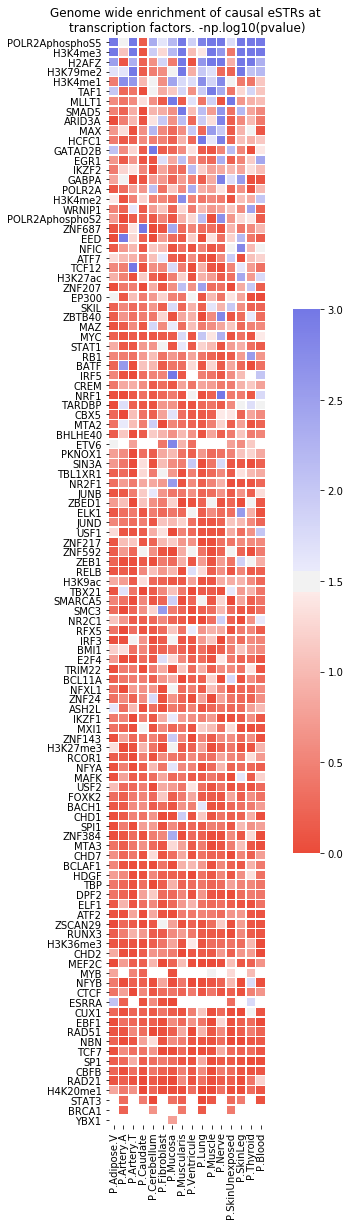

In [32]:
fig, ax = plt.subplots(figsize=(10, 20))
cmap = sns.diverging_palette(15, 265, s=80, l=55, n=9, as_cmap=True)    
sns.heatmap(pdata1, cmap=cmap,  annot_kws={"size": 5},
            vmin=0, vmax=3, square=True, ax=ax, linewidths=0.5, cbar_kws={"shrink": 0.5},
           xticklabels=list(pdata1.columns), 
           yticklabels=[x for x in list(pdata1.index)])
plt.title('Genome wide enrichment of causal eSTRs at \ntranscription factors. -np.log10(pvalue)')
ax.invert_xaxis()
plt.show()

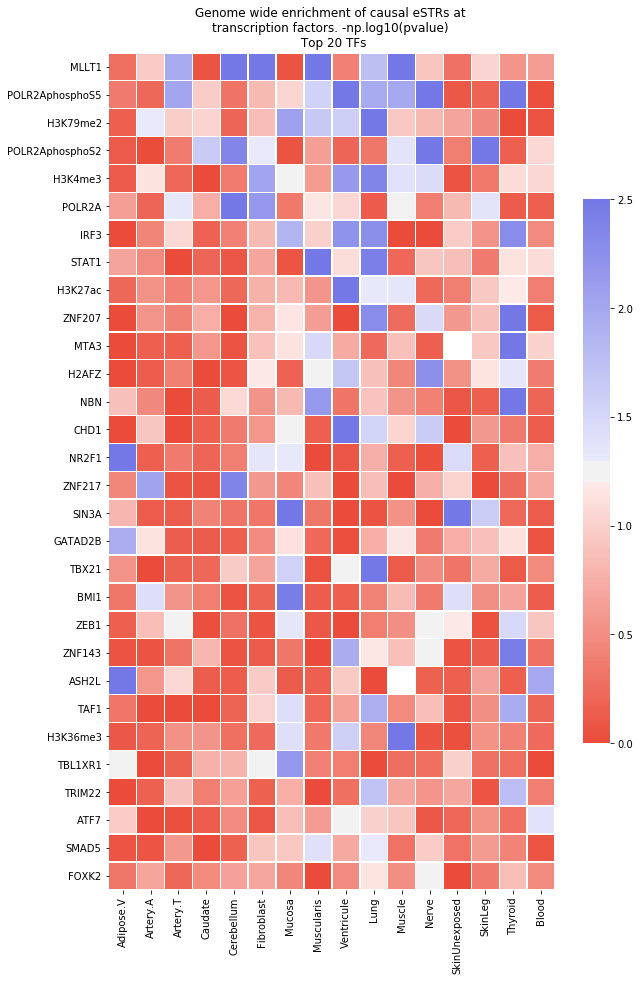

In [28]:
##Cut to show subset
#subset_data = subset_data.loc[subset_data['P.Thyroid']>=1].copy()
subset_data = pdata1.head(30).copy()   #Top 20
fig, ax = plt.subplots(figsize=(10, 20))
cmap = sns.diverging_palette(15, 265, s=80, l=55, n=9, as_cmap=True)    
sns.heatmap(subset_data, cmap=cmap,  annot_kws={"size": 5},
            vmin=0, vmax=2.5, square=True, ax=ax, linewidths=0.5, cbar_kws={"shrink": 0.5},
           xticklabels=[x.split('P.')[1] for x in list(subset_data.columns)], 
           yticklabels=[x for x in list(subset_data.index)])
plt.title('Genome wide enrichment of causal eSTRs at \ntranscription factors. -np.log10(pvalue) \n Top 20 TFs')
ax.invert_xaxis()
plt.show()

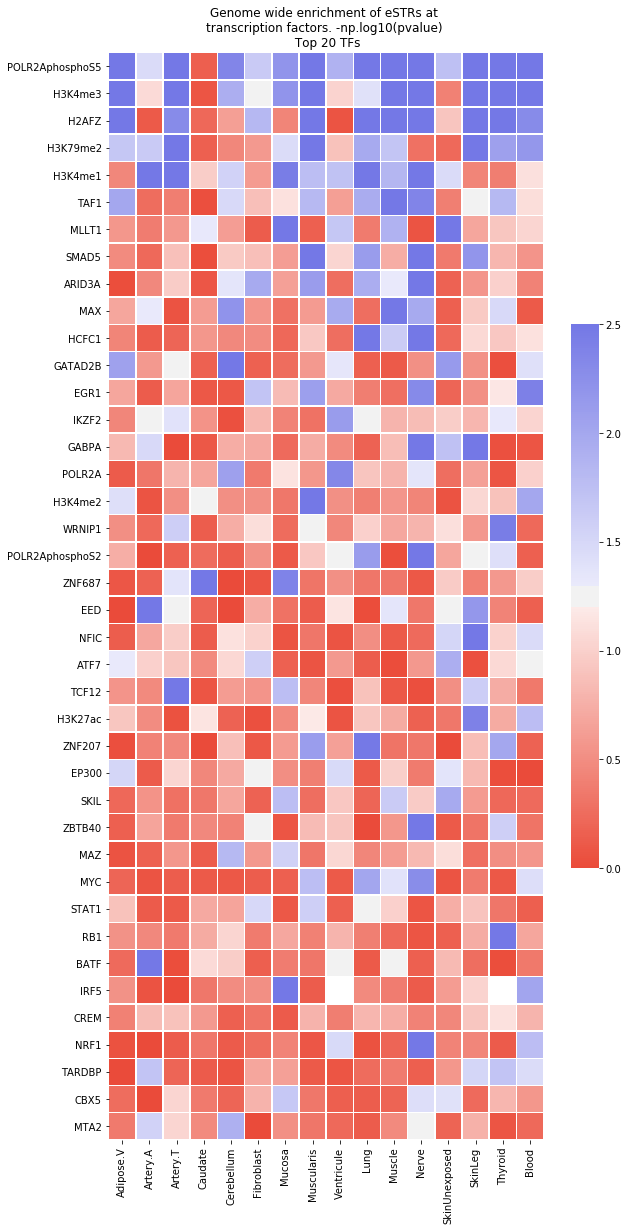

In [33]:
##Cut to show subset
#subset_data = subset_data.loc[subset_data['P.Thyroid']>=1].copy()
subset_data = pdata1.head(40).copy()   #Top 40
fig, ax = plt.subplots(figsize=(10, 20))
cmap = sns.diverging_palette(15, 265, s=80, l=55, n=9, as_cmap=True)    
sns.heatmap(subset_data, cmap=cmap,  annot_kws={"size": 5},
            vmin=0, vmax=2.5, square=True, ax=ax, linewidths=0.5, cbar_kws={"shrink": 0.5},
           xticklabels=[x.split('P.')[1] for x in list(subset_data.columns)], 
           yticklabels=[x for x in list(subset_data.index)])
plt.title('Genome wide enrichment of eSTRs at \ntranscription factors. -np.log10(pvalue) \n Top 20 TFs')
ax.invert_xaxis()
plt.show()

In [26]:
"""
A. For each tissue, enrichment [how likely are eSTRs to fall in TF sites]
Fisher test at each tissue
    Background: All STRs
    Forground: eSTRs that fall within TFs 

"""

# Libraries
from collections import defaultdict
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as ss
import seaborn.apionly as sns

#variables

SHORTEN = {
    "Artery-Aorta":"Artery.A"     ,
    "Artery-Tibial": "Artery.T",
    "Adipose-Subcutaneous": "Adipose.S",    
    "Adipose-Visceral":"Adipose.V",
    "Brain-Caudate":"Caudate"   , 
    "Brain-Cerebellum":"Cerebellum",
    "Cells-Transformedfibroblasts": "Fibroblast",
    "Esophagus-Mucosa": "Mucosa",
    "Esophagus-Muscularis":"Muscularis",
    "Heart-LeftVentricle":"Ventricule",
    "Lung": "Lung",
    "Muscle-Skeletal": "Muscle",
    "Nerve-Tibial":"Nerve",
    "Skin-NotSunExposed": "SkinUnexposed",
    "Skin-SunExposed":"SkinLeg",
    "Thyroid":"Thyroid",
    "WholeBlood": "Blood"
}
TISSUES = sorted([item for item in list(SHORTEN.keys())])
regr='/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/'

#open files   ##tfbs on Lymphoblast cell line 
#Background : All STRs
# Cont. Table by Tissues
TFs = '/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/enrichment/'
transfacts = os.listdir(TFs)
transfacts = [x for x in transfacts if 'tfbs_eSTRs_enrich.tab' in x]
# Fisher test at tissues
DATA=[]
for i in range (len(TISSUES)):
    # Data
    P=[]
    tis = TISSUES[i]
    data1 = pd.read_csv(TFs+tis+'_tfbs_eSTRs_enrich.tab', sep='\t')
    data = data1.loc[data1['AB']>=50].copy()
    data[SHORTEN[tis]] = -np.log10(data['pval'])
    #pvalues in tissue
    PV = data[['category',SHORTEN[tis]]]   
    DATA.append(PV)
    
pdata=PV
oddpdata = data[['category','Odd.'+SHORTEN[tis]]]
#pdata = pd.merge(DATA[0], DATA[1], on='category')
for i in range (len(TISSUES)-2,0,-1):
    pdata = pd.merge(pdata, DATA[i], on='category', how='outer')  
    oddpdata = pd.merge(oddpdata, ODD[i], on='category', how='outer')
    
#TODO   consolidate Esophagus-Mucosa tissue

KeyError: "['Odd.Blood'] not in index"

In [ ]:
pdata['p.Enrichment'] = pdata.sum(axis=1)
pdata = pdata.sort_values('p.Enrichment', ascending=False)
#Restrict to GM cell line
Cell = [x for x in list(pdata['category']) if 'GM12878' in x]
pdata1 = pdata.loc[pdata['category'].isin(Cell)]
pdata1.index=[x.split('_')[0] for x in list(pdata1['category'])]
del pdata1['category']
del pdata1['p.Enrichment']


fig, ax = plt.subplots(figsize=(10, 20))
cmap = sns.diverging_palette(15, 265, s=80, l=55, n=9, as_cmap=True)    
sns.heatmap(pdata1, cmap=cmap,  annot_kws={"size": 5},
            vmin=0, vmax=3, square=True, ax=ax, linewidths=0.5, cbar_kws={"shrink": 0.5},
           xticklabels=list(pdata1.columns), 
           yticklabels=[x for x in list(pdata1.index)])
plt.title('Genome wide enrichment of eSTRs at \ntranscription factors. -np.log10(pvalue)')
ax.invert_xaxis()
plt.show()

In [ ]:
Cell lines
        GM12878 ***   
        A549       
        OCI-LY7    
        HL-60        
        NB4      